### By Meron Goitom

# Identifying Fraud from Enron Emails and Financial Data

# Project Overview

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.

In this project I will build a person of interest (POI) identifier using machine learning, based on financial and email data made public as a result of the Enron scandal. A person of interest (POI) are individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. 

There are seven major steps in my project:

- Data Exploration
- Outlier Investigation
- Create new features
- Features select
- Properly scale features
- Pick an algorithm
- Tune the algorithm

## Data Preparation

In [7]:
import pickle
import sys

sys.path.append("/Users/merongoitom/Desktop/Nanodegree/ML/Udacity_course/Lesson1_Project/ud120-projects2/tools/")
data_dict = pickle.load(open('/Users/merongoitom/Desktop/Nanodegree/ML/Udacity_course/Lesson1_Project/ud120-projects2/final_project/final_project_dataset.pkl', "r"))

# Data Exploration
- Total number of data points
- Allocation across classes (POI/non-POI)
- Number of features
- Are there features with many missing values? etc.

In [8]:
import Data_Exploration
Data_Exploration.Q_A(data_dict)

Number of people in the dataset: 146
Number of feature for each person: 21
number of POI's in the dataset: 18
Total value of the stock - James Prentice: 1095040
Nr of email messages to poi - Wesley Colwell: 11
Value of stock options - Jeffrey K Skillin: 19250000
Total Payments - Lay: 103559793
Total Payments - Skilling: 8682716
Total Payments - Fastow: 2424083
Quantified salary: 95
Known email address: 111
Nr of 'NaN' for their total payments: 21
Percentage of people: 14.3835616438
Nr of 'NaN' for their total payments: 0
Percentage of people: 0.0


### Understanding the Dataset

POIs are defined as peopelse who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.
In addition to the labeled labeled POI feature the dataset contains 146 records with 24 features, mostly financial data but also email correspondence features. 
Of the 146 people in the dataset, 18 were labeled as POI, persons of interest.

# Outlier investigation
Now that i have some insight into what the data is made out of, I continue by visualizing the data, to see if i can spot an outlier. I do this by ploting salaries and bonuses for the Enron employees.

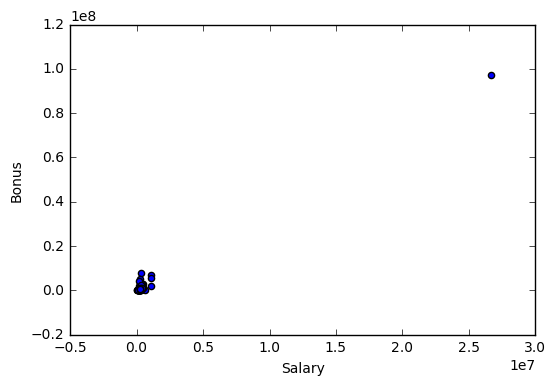

In [3]:
import Outlier_Investigation
Outlier_Investigation.plot(data_dict)

From the plot we can easily see theres one datapoint that clearly stands out.
To handle these outliers correctly i need to identify the cause for it's strange values. I start by populated two dictionary with the bonus and salary in descending order and then print the key and value for the individuals with highest recorded bonus and salary.

In [4]:
import Outlier_Investigation
Outlier_Investigation.bonus_outlier(data_dict)

[('TOTAL', 97343619),
 ('LAVORATO JOHN J', 8000000),
 ('LAY KENNETH L', 7000000),
 ('SKILLING JEFFREY K', 5600000),
 ('BELDEN TIMOTHY N', 5249999)]


In [5]:
import Outlier_Investigation
Outlier_Investigation.salary_outliers(data_dict)

[('TOTAL', 26704229),
 ('SKILLING JEFFREY K', 1111258),
 ('LAY KENNETH L', 1072321),
 ('FREVERT MARK A', 1060932),
 ('PICKERING MARK R', 655037)]


The following outlier was identified.

• TOTAL: The TOTAL key-value pair is most likley taken from the spreadsheet data and has been mistaken for a person.

This error leads me to believe there could be more outliers in the data. So i look through the spreadsheet to see if I can spot similar scenarios that can create the same error.

In [6]:
data_dict["THE TRAVEL AGENCY IN THE PARK"];

• THE TRAVEL AGENCY IN THE PARK: This record is not a person.

Both of these data-errors should be removed so as not to negatively affect the analysis at a later stage.

In [7]:
data_dict.pop( "TOTAL", 0 );
data_dict.pop( "THE TRAVEL AGENCY IN THE PARK", 0 );

Then i plot the salaries and bonuses for the Enron employees again.

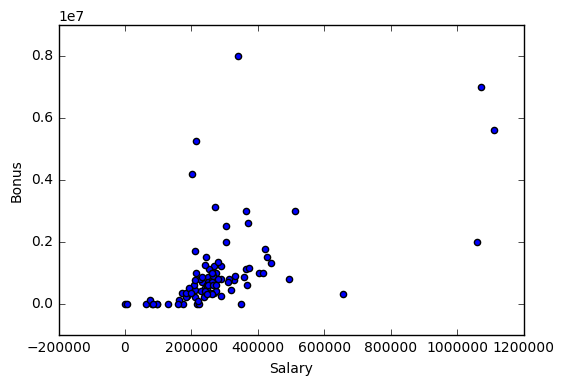

In [8]:
import Outlier_Investigation
Outlier_Investigation.plot_clean(data_dict)

# Create new features
In the data exploration phase we found a number of "NaN" values, let us examine this closer.

In [9]:
import Create_new_features
print Create_new_features.check_NaN(data_dict).isnull().sum()
print Create_new_features.check_NaN(data_dict).shape

bonus                         63
deferral_payments            106
deferred_income               96
director_fees                128
email_address                 33
exercised_stock_options       43
expenses                      50
from_messages                 58
from_poi_to_this_person       58
from_this_person_to_poi       58
loan_advances                141
long_term_incentive           79
other                         53
poi                            0
restricted_stock              35
restricted_stock_deferred    127
salary                        50
shared_receipt_with_poi       58
to_messages                   58
total_payments                21
total_stock_value             19
dtype: int64
(144, 21)


By applying "remove_NaN=True" & "remove_all_zeroes=True" as parameters to feature_format -> featureFormat, this will convert "NaN" strings to 0.0

# Features select

Okej now that we've got all the "NaN" values are dealt with, let's using selectKBest from sklearns feature-selection utility to identify the 10 best features to select for further analysis. 

The 10 selected features are printed below.

In [10]:
import Create_new_features
target_label = 'poi'
best_features = Create_new_features.kbest(data_dict)
new_features_list = [target_label] + best_features.keys()

features_list = new_features_list
    
print "{0} selected features: {1}\n".format(len(features_list) - 1, features_list[1:])

10 selected features: ['salary', 'total_payments', 'loan_advances', 'bonus', 'total_stock_value', 'shared_receipt_with_poi', 'exercised_stock_options', 'deferred_income', 'restricted_stock', 'long_term_incentive']



#### Let's create new features
Namely how intensive was the email correspondence with people of interest 'poi_ratio', how big portion of the sent mail was to people of interest 'fraction_to_poi', and how big portion of the recieved mail was from people of interest 'fraction_from_poi'?

In [11]:
import warnings
warnings.filterwarnings('ignore')

# add the new features to our list of importent festures
Create_new_features.new_features(data_dict, features_list)

eng_feature_list=features_list 
print eng_feature_list

['poi', 'salary', 'total_payments', 'loan_advances', 'bonus', 'total_stock_value', 'shared_receipt_with_poi', 'exercised_stock_options', 'deferred_income', 'restricted_stock', 'long_term_incentive', 'poi_ratio', 'fraction_to_poi', 'fraction_from_poi']


# Properly scale features

#### Finally, lets scale the features using the preprocessing module and MinMaxScale utility

In [13]:
from sklearn.preprocessing import MinMaxScaler
from feature_format import featureFormat,targetFeatureSplit

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# scale features using min-max
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
print features

[[ 0.32916568  0.01025327  0.         ...,  0.20793561  0.03448276
   0.2166548 ]
 [ 0.24036002  0.05440667  0.         ...,  0.          0.          0.        ]
 [ 0.15382656  0.00204447  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.23866105  0.01055103  0.         ...,  0.          0.          0.        ]
 [ 0.25070776  0.00845656  0.         ...,  1.          0.5         1.        ]
 [ 0.24744479  0.0122855   0.         ...,  0.29080159  0.375       0.27406108]]


### Now its time to split the data into training and testing set

In [14]:
from sklearn.cross_validation import train_test_split
features_train,features_test,labels_train,labels_test = train_test_split(features,labels, test_size=0.3, random_state=42)
    
print labels
print features

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
[[ 0.32916568  0.01025327  0.         ...,  0.20793561  0.03448276
   0.2166548 ]
 [ 0.24036002  0.05440667  0.         ...,  0.          0.          0.        ]
 [ 0.15382656  0.00204447  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.23866105  0.01055103  0.      

# Pick and tune an algorithm
Here i will test different algorithms and evaluatw their performance, the algorithms i've decide to test are "Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes".

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matrics

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
             "Random Forest", "AdaBoost", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel='rbf', gamma=2, C=10),
    DecisionTreeClassifier(max_depth=2),
    RandomForestClassifier(max_depth=10, n_estimators=5, max_features=1),
    AdaBoostClassifier(algorithm='SAMME', n_estimators=5),
    GaussianNB()]

# iterate over classifiers and print out the scores
for name, clf in zip(names, classifiers):
        clf.fit(features_train,labels_train)
        scores = clf.score(features_test,labels_test)
        print " "
        print "Classifier:"
        matrics.evaluate_clf(clf, features, labels, num_iters=1000, test_size=0.3)
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        print "====================================================================="


 
Classifier:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
precision: 0.143410714286
recall:    0.0652313852814
Accuracy: 0.84 (+/- 0.00)
 
Classifier:
SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
precision: 0.0
recall:    0.0
Accuracy: 0.84 (+/- 0.00)
 
Classifier:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
precision: 0.0938642857143
recall:    0.0634535714286
Accuracy: 0.79 (+/- 0.00)
 
Classifier:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes

# Tune the algorithm
I got significant success with AdaBoost Classifier and DecisionTree Classifier so i decided to move forward with one of them, in this case the DecisionTreeClassifier to see if i can imporve the model further.

I have decided to use GridSearchCV to optimized my DecisionTreeClassifier algorithm over a parameter grid. Giving me the optimal parameters for my model.

In [26]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(labels, n_iter=10)

from time import time
t0 = time()
param_grid = {'max_depth': [1,2,3,4,5,6,8,9,10],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5,6,7,8], 'criterion':('gini', 'entropy')}

clf = DecisionTreeClassifier() 
GS_clf = GridSearchCV(clf, param_grid,  cv = cv)
GS_clf.fit(features, labels)


print GS_clf.best_estimator_
print GS_clf.best_score_
print 'Processing time:',round(time()-t0,3) ,'s'

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=7,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.946666666667
Processing time: 21.004 s


### Finally i tested it using the Cross-validation iterator StratifiedShuffleSplit, with 1000 folds as provided in the tester.py script.

In [27]:
from tester import test_classifier, dump_classifier_and_data

t0 = time()
best_clf = GS_clf.best_estimator_

test_classifier(best_clf, data_dict, eng_feature_list)

print 'Processing time:',round(time()-t0,3) ,'s'

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=7,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.87907	Precision: 0.59810	Recall: 0.28350	F1: 0.38467	F2: 0.31683
	Total predictions: 15000	True positives:  567	False positives:  381	False negatives: 1433	True negatives: 12619

Processing time: 1.509 s


### Testing DecisionTreeClassifier best estimator

In [28]:
t0 = time()
best_clf = GS_clf.best_estimator_
best_score = GS_clf.best_score_

matrics.evaluate_clf(best_clf, features, labels, num_iters=1000, test_size=0.3)
print "Accuracy: %0.2f (+/- %0.2f)" % (best_score.mean(), best_score.std() * 2)
print 'Processing time:',round(time()-t0,3) ,'s'

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=7,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
precision: 0.380847202797
recall:    0.269944264069
Accuracy: 0.95 (+/- 0.00)
Processing time: 2.557 s


# Dump successful classifier

In [29]:
dump_classifier_and_data(best_clf, data_dict, eng_feature_list)